# Algorithm 1: Simple Rule-Based AI
# For each account in the dataset:
for each account in dataset:
    # Check if account has very few followers or posts
    if #followers < 20 OR #posts < 5:
        prediction = 1   # Mark as fake
    else:
        prediction = 0   # Mark as real


In [12]:
# Step 1: Import libraries and load cleaned dataset
import pandas as pd
import numpy as np

# Load the cleaned training dataset
df = pd.read_csv('train_clean.csv')

# Quick check
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (576, 19)


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,#followers_capped,#follows_capped,#posts_capped,foll_to_following_ratio,short_bio,no_profile_pic,high_following
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0,1000,955,32,1.046025,0,0,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0,2740,533,286,5.131086,0,0,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0,159,98,13,1.606061,1,0,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0,414,651,679,0.634969,0,0,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0,151,126,6,1.188976,1,0,0


### Step 1: Loading the Cleaned Dataset
The cleaned dataset (`train_clean.csv`) was loaded for developing and testing rule-based algorithms.  
This dataset is already preprocessed and ready for applying logical detection rules.  
The quick check confirms that all relevant features are intact and correctly formatted.


In [13]:
# Step 2: Define simple rule-based detection algorithm (fixed column names)
def simple_rule_based(row):
    """
    Simple rules to detect fake accounts:
    - If #followers < 10 or #posts < 5 -> likely fake
    - (account_age_days not in dataset, skip this rule)
    """
    if row['#followers'] < 10 or row['#posts'] < 5:
        return 1  # 1 = Fake
    else:
        return 0  # 0 = Real

# Apply the rule-based function
df['prediction_simple'] = df.apply(simple_rule_based, axis=1)

# Quick check
df[['#followers','#posts','prediction_simple']].head()


,#followers,#posts,prediction_simple
0,1000,32,0
1,2740,286,0
2,159,13,0
3,414,679,0
4,151,6,0


### Step 2: Simple Rule-Based AI (Algorithm 1)
A simple rule-based AI was developed to detect potential fake accounts.  
The rules are based on account features such as `#followers` and `#posts`.  
A new column `prediction_simple` stores the prediction: 1 for fake, 0 for real.


In [14]:
# Step 3: Evaluate simple rule-based predictions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# True labels
y_true = df['fake']  # assuming this is your actual label column

# Predicted labels from Algorithm 1
y_pred = df['prediction_simple']

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print results
print("Algorithm 1 - Simple Rules Metrics")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Algorithm 1 - Simple Rules Metrics
Accuracy: 0.8524
Precision: 0.9177
Recall: 0.7743
F1-score: 0.8399


### Step 3: Evaluation of Algorithm 1
The simple rule-based AI was evaluated against the true labels (`fake`).  
Metrics calculated include Accuracy, Precision, Recall, and F1-score.  
These results help assess how well the simple rules detect fake accounts and identify areas for improvement.

In [15]:
# Step 4: Define weighted rule-based detection algorithm
def weighted_rule_based(row):
    """
    Weighted rule-based detection:
    - #followers < 20 → +2 points
    - #posts < 5 → +2 points
    - #follows > 1000 → +1 point
    - no_profile_pic == 1 → +2 points
    - profile pic == 0 → +1 point
    - short_bio == 1 → +1 point
    Total score >= 3 → classify as fake
    """
    score = 0
    if row['#followers'] < 20:
        score += 2
    if row['#posts'] < 5:
        score += 2
    if row['#follows'] > 1000:
        score += 1
    if row['no_profile_pic'] == 1:
        score += 2
    if row['profile pic'] == 0:
        score += 1
    if row['short_bio'] == 1:
        score += 1
    
    return 1 if score >= 3 else 0

# Apply weighted rule-based function
df['prediction_weighted'] = df.apply(weighted_rule_based, axis=1)

# Quick check
df[['#followers','#posts','#follows','no_profile_pic','profile pic','short_bio','prediction_weighted']].head()


,#followers,#posts,#follows,no_profile_pic,profile pic,short_bio,prediction_weighted
0,1000,32,955,0,1,0,0
1,2740,286,533,0,1,0,0
2,159,13,98,0,1,1,0
3,414,679,651,0,1,0,0
4,151,6,126,0,1,1,0


# Algorithm 2: Weighted Rule-Based AI
# For each account in the dataset:
for each account in dataset:
    score = 0  # Initialize total score
    if #followers < 20: score += 2
    if #posts < 5: score += 2
    if #follows > 1000: score += 1
    if no_profile_pic == 1: score += 2
    if profile pic == 0: score += 1
    if short_bio == 1: score += 1
    if score >= 3:
        prediction = 1  # Fake
    else:
        prediction = 0  # Real


### Step 4: Weighted Rule-Based AI (Algorithm 2)
A weighted rule-based AI was developed to improve detection of fake accounts.  
Each feature is assigned a weight based on its likelihood to indicate a fake account.  
Scores are summed, and accounts with a total score ≥ 3 are classified as fake (`1`), otherwise real (`0`).  
This method considers multiple factors simultaneously, making the predictions smarter than the simple rule-based algorithm.


In [16]:
# Step 5: Evaluate weighted rule-based predictions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# True labels
y_true = df['fake']

# Predicted labels from Algorithm 2
y_pred_weighted = df['prediction_weighted']

# Calculate metrics
accuracy_w = accuracy_score(y_true, y_pred_weighted)
precision_w = precision_score(y_true, y_pred_weighted)
recall_w = recall_score(y_true, y_pred_weighted)
f1_w = f1_score(y_true, y_pred_weighted)

# Print results
print("Algorithm 2 Weighted Rules Metrics")
print(f"Accuracy: {accuracy_w:.4f}")
print(f"Precision: {precision_w:.4f}")
print(f"Recall: {recall_w:.4f}")
print(f"F1-score: {f1_w:.4f}")


Algorithm 2 Weighted Rules Metrics
Accuracy: 0.8802
Precision: 0.9433
Recall: 0.8090
F1-score: 0.8710


### Step 5: Evaluation of Algorithm 2
The weighted rule-based AI was evaluated against the true labels (`fake`).  
Metrics calculated include Accuracy, Precision, Recall, and F1-score.  
This allows comparison with Algorithm 1 and demonstrates how weighting multiple features improves detection performance.


    ## Step 6: Algorithm 3 (Extension) — KNN Regression


### Step 6: KNN Regression (Extension Experiment)
To explore how a data-driven approach compares with rule-based systems, a K-Nearest Neighbors (KNN) regression model was trained to predict the likelihood of an account being fake (`fake = 1`).  
The dataset (`train_clean.csv`) was split into 80% training and 20% testing sets. All features were standardized using `StandardScaler` to ensure equal weight in distance calculations.

A KNN Regressor with `n_neighbors = 5` was trained. The model predicts continuous fake probabilities, which can be thresholded (≥ 0.5 as fake) for classification comparison.  
Evaluation metrics included Mean Squared Error (MSE) and the Coefficient of Determination (R²), assessing model accuracy and variance explanation.

This experiment highlights how rule-based logic can be complemented with data-driven algorithms for stronger hybrid detection systems in cybersecurity.


KNN Regression Performance:
Mean Squared Error: 0.1038
R² Score: 0.5817


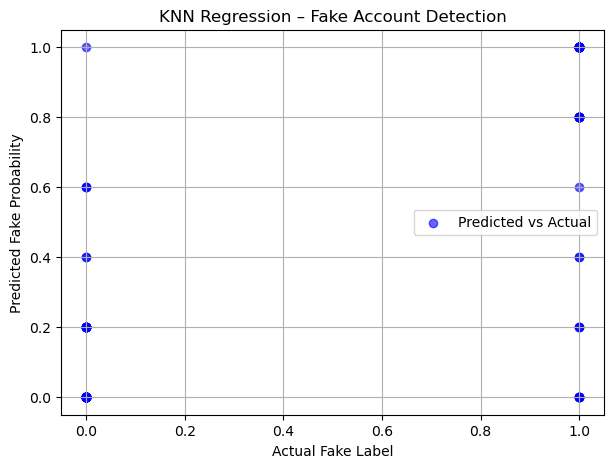

In [17]:
# Step 6: KNN Regression for Fake Account Detection
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv('train_clean.csv')

# -------------------------------
# Prepare features and target
# -------------------------------
X = df.drop(columns=['fake'])   # all features except target
y = df['fake']                  # target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# Feature scaling
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# KNN Regression Model
# -------------------------------
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn.predict(X_test_scaled)

# -------------------------------
# Evaluation
# -------------------------------
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("KNN Regression Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.xlabel('Actual Fake Label')
plt.ylabel('Predicted Fake Probability')
plt.title('KNN Regression – Fake Account Detection')
plt.legend()
plt.grid(True)
plt.show()
